# CNN Demo
This notebook demonstrates Convolutional Neural Networks (CNNs) for image classification.

## Load data

### Subtask:
Load the Fashion MNIST dataset and display its shape and sample images.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of training data (x_train): (60000, 28, 28)
Shape of training labels (y_train): (60000,)
Shape of testing data (x_test): (10000, 28, 28)
Shape of testing labels (y_test): (10000,)

Sample Images from the Fashion MNIST dataset:


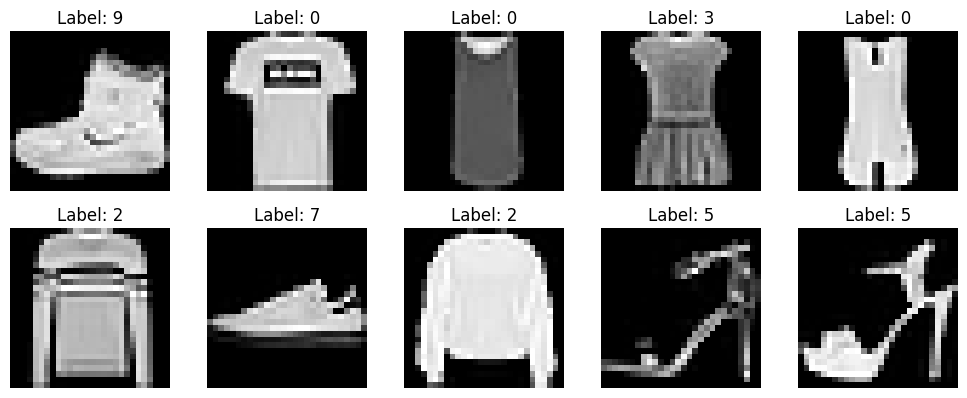

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Display the shape of the loaded data
print("Shape of training data (x_train):", x_train.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing data (x_test):", x_test.shape)
print("Shape of testing labels (y_test):", y_test.shape)

# Display a few sample images
print("\nSample Images from the Fashion MNIST dataset:")
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

The code in the cell above loads the Fashion MNIST dataset, which is a dataset of 70,000 grayscale images of 10 different fashion items. The dataset is split into two parts:

*   **Training data (`x_train`, `y_train`)**: This part is used to train the CNN model. `x_train` contains 60,000 images, and `y_train` contains the corresponding labels for each image.
*   **Testing data (`x_test`, `y_test`)**: This part is used to evaluate the performance of the trained model on unseen data. `x_test` contains 10,000 images, and `y_test` contains the corresponding labels.

The **labels** in this dataset are integers representing the class of the fashion item in the image. The classes are:

*   0: T-shirt/top
*   1: Trouser
*   2: Pullover
*   3: Dress
*   4: Coat
*   5: Sandal
*   6: Shirt
*   7: Sneaker
*   8: Bag
*   9: Ankle boot

The code also prints the shape of the loaded data, showing the number of images and the dimensions of each image (28x28 pixels). Finally, it displays a few sample images from the training set along with their corresponding labels to give a visual idea of the dataset.

## Data preprocessing

### Subtask:
Preprocess the image data by scaling pixel values and reshaping the images to include a channel dimension.

In [4]:
# Scale the pixel values to the range [0, 1]
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

# Reshape the images to add a channel dimension (for grayscale, the channel is 1)
x_train_reshaped = x_train_scaled.reshape(x_train_scaled.shape[0], 28, 28, 1)
x_test_reshaped = x_test_scaled.reshape(x_test_scaled.shape[0], 28, 28, 1)

# Print the shapes to verify the preprocessing
print("Shape of scaled and reshaped training data:", x_train_reshaped.shape)
print("Shape of scaled and reshaped testing data:", x_test_reshaped.shape)

Shape of scaled and reshaped training data: (60000, 28, 28, 1)
Shape of scaled and reshaped testing data: (10000, 28, 28, 1)


The code in the cell above performs data preprocessing on the Fashion MNIST images. This is a crucial step before feeding the data into a CNN model. Here's a breakdown:

*   **Scaling Pixel Values**: Image pixel values are typically in the range of 0 to 255. Scaling these values to a smaller range, like [0, 1], helps in faster and more stable training of neural networks. The code achieves this by dividing each pixel value in both the training (`x_train`) and testing (`x_test`) datasets by 255.0.
*   **Reshaping Images**: CNN layers, specifically convolutional layers, expect input images to have a specific shape: (height, width, channels). For grayscale images like those in Fashion MNIST, there is only one channel. The original shape of the images is (number of images, height, width). The code reshapes the scaled images to include this channel dimension using the `.reshape()` method. The new shape becomes (number of images, 28, 28, 1).

Finally, the code prints the shapes of the scaled and reshaped training and testing data to confirm that the preprocessing steps were applied correctly.

## Build CNN model

### Subtask:
Import necessary libraries and define the CNN model architecture

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model architecture
model = Sequential([
    # Convolutional layer 1
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling layer 1
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 2
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # Pooling layer 2
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer to transition from convolutional to dense layers
    Flatten(),

    # Dense layer 1
    Dense(units=128, activation='relu'),

    # Output dense layer with softmax activation for 10 classes (Fashion MNIST)
    Dense(units=10, activation='softmax')
])

# Print the model summary to visualize the architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

The code in the cell above defines the architecture of the Convolutional Neural Network (CNN) using the Keras Sequential API. Here's a breakdown of the layers:

*   **`Sequential([...])`**: This creates a linear stack of layers, which is a common way to build neural networks.
*   **`Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))`**: This is the first convolutional layer.
    *   `filters=32`: Specifies the number of output filters (feature maps) in the convolution.
    *   `kernel_size=(3, 3)`: Defines the size of the convolutional kernel (filter).
    *   `activation='relu'`: Uses the Rectified Linear Unit (ReLU) activation function, which introduces non-linearity.
    *   `input_shape=(28, 28, 1)`: Specifies the shape of the input images (height, width, channels). This is only required for the first layer.
*   **`MaxPooling2D(pool_size=(2, 2))`**: This is a max pooling layer.
    *   `pool_size=(2, 2)`: Defines the size of the pooling window. It reduces the spatial dimensions (height and width) of the input by taking the maximum value within each window.
*   **`Conv2D(filters=64, kernel_size=(3, 3), activation='relu')`**: This is the second convolutional layer, similar to the first but with 64 filters.
*   **`MaxPooling2D(pool_size=(2, 2))`**: This is the second max pooling layer.
*   **`Flatten()`**: This layer flattens the output of the convolutional and pooling layers into a one-dimensional array, which is required before feeding the data into dense layers.
*   **`Dense(units=128, activation='relu')`**: This is the first dense (fully connected) layer.
    *   `units=128`: Specifies the number of neurons in this layer.
    *   `activation='relu'`: Uses the ReLU activation function.
*   **`Dense(units=10, activation='softmax')`**: This is the output dense layer.
    *   `units=10`: Specifies the number of neurons, which is equal to the number of classes in the Fashion MNIST dataset (10 classes).
    *   `activation='softmax'`: Uses the softmax activation function, which outputs a probability distribution over the 10 classes. The class with the highest probability is the predicted class.

The `model.summary()` line prints a summary of the model architecture, showing the layers, output shapes, and the number of parameters in each layer.

## Compile CNN model

### Subtask:
Compile the defined CNN model with the specified optimizer, loss function, and metrics.

In [6]:
# Compile the CNN model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("CNN model compiled successfully with Adam optimizer, sparse_categorical_crossentropy loss, and accuracy metric.")

CNN model compiled successfully with Adam optimizer, sparse_categorical_crossentropy loss, and accuracy metric.


The code in the cell above compiles the defined CNN model. This is a necessary step before training the model. Here's what the compilation process involves:

*   **`model.compile(...)`**: This method configures the model for training.
*   **`optimizer='adam'`**: This specifies the optimizer to be used for training. The Adam optimizer is a popular choice that adapts the learning rate during training, often leading to faster convergence.
*   **`loss='sparse_categorical_crossentropy'`**: This defines the loss function that the model will try to minimize during training. `sparse_categorical_crossentropy` is suitable for classification problems where the labels are integers (as in the Fashion MNIST dataset). It measures how well the model's predicted probability distribution matches the true label.
*   **`metrics=['accuracy']`**: This specifies the metrics that will be used to evaluate the model's performance during training and testing. 'accuracy' measures the percentage of correctly classified examples.

Compiling the model prepares it for the training process by setting up the optimization algorithm, loss function, and evaluation metrics.

## Train the cnn model

### Subtask:
Train the compiled CNN model using the scaled and reshaped training data and the training labels. Use a validation split to monitor performance during training and store the training history.

In [7]:
# Train the CNN model
epochs = 10
batch_size = 32

history = model.fit(x_train_reshaped, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

print(f"CNN model trained successfully for {epochs} epochs with batch size {batch_size}.")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7629 - loss: 0.6621 - val_accuracy: 0.8738 - val_loss: 0.3513
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8805 - loss: 0.3336 - val_accuracy: 0.8841 - val_loss: 0.3136
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.8988 - loss: 0.2789 - val_accuracy: 0.8997 - val_loss: 0.2777
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9103 - loss: 0.2424 - val_accuracy: 0.9046 - val_loss: 0.2616
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9188 - loss: 0.2178 - val_accuracy: 0.9077 - val_loss: 0.2510
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9304 - loss: 0.1888 - val_accuracy: 0.9116 - val_loss: 0.2520
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9367 - loss: 0.1680 - val_accuracy: 0.9125 - val_loss: 0.2489
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9447 -

The code in the cell above trains the compiled CNN model on the preprocessed training data. Here's a breakdown of the training process:

*   **`epochs = 10`**: This sets the number of epochs for training. An epoch is one complete pass through the entire training dataset.
*   **`batch_size = 32`**: This sets the batch size. The training data is divided into smaller batches, and the model's weights are updated after processing each batch. Using batches helps in faster training and can improve convergence.
*   **`history = model.fit(...)`**: This method trains the model.
    *   `x_train_reshaped`: The preprocessed training images.
    *   `y_train`: The corresponding training labels.
    *   `epochs=epochs`: The number of epochs to train for.
    *   `batch_size=batch_size`: The batch size to use.
    *   `validation_split=0.2`: This reserves 20% of the training data as validation data. The model is evaluated on this validation data at the end of each epoch. This helps in monitoring the model's performance on unseen data during training and can help detect overfitting.
*   **`history`**: This variable stores the training history, including the loss and metrics (like accuracy) for both the training and validation sets at each epoch.

The output during training shows the loss and accuracy for both the training and validation sets for each epoch.

## Evaluate CNN model

### Subtask:
Evaluate the trained CNN model on the test data to assess its performance on unseen examples.

In [8]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9071 - loss: 0.3123

Test Loss: 0.3057
Test Accuracy: 0.9097


The code in the cell above evaluates the trained CNN model on the test dataset to assess its performance on unseen data.

*   **`model.evaluate(x_test_reshaped, y_test)`**: This method evaluates the model.
    *   `x_test_reshaped`: The preprocessed testing images.
    *   `y_test`: The corresponding testing labels.
*   **`test_loss, test_accuracy = ...`**: This unpacks the results of the evaluation. `test_loss` is the value of the loss function on the test set, and `test_accuracy` is the accuracy of the model on the test set.

The printed output shows the `Test Loss` and `Test Accuracy`.

*   **Test Loss**: A lower test loss indicates that the model's predictions are closer to the actual labels on the test set.
*   **Test Accuracy**: Test accuracy represents the proportion of correctly classified images in the test set. A higher test accuracy indicates better performance of the model on unseen data.

## Make predictions

### Subtask:
Use the trained model to predict the class of a few sample images from the test set and display the predicted labels along with the actual labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Sample Predictions:


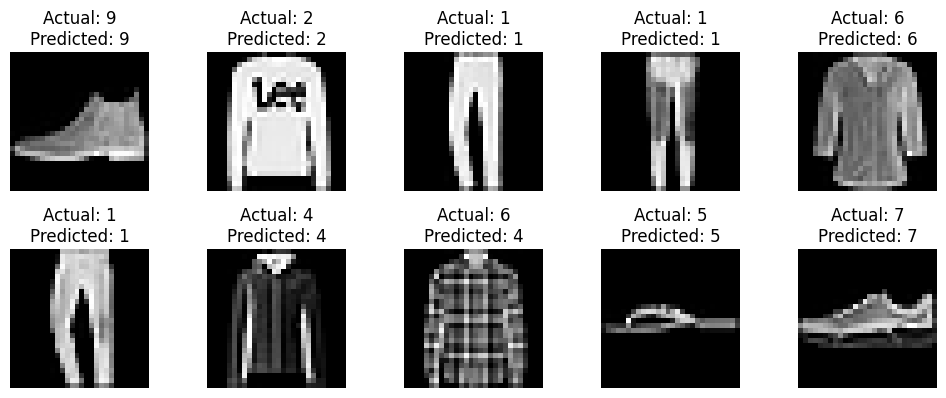

In [9]:
import numpy as np

# Make predictions on the test data
predictions = model.predict(x_test_reshaped)

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display a few sample images with their predicted and actual labels
print("Sample Predictions:")
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

This section demonstrates how to use the trained CNN model to make predictions on new, unseen images. By comparing the predicted labels with the actual labels, we can visually assess the model's performance on individual examples.

## Summary

The CNN model was successfully built and trained on the Fashion MNIST dataset for image classification.

**Workflow**:

1.  **Data Loading**: The Fashion MNIST dataset was loaded, providing training and testing sets of images and their corresponding labels.
2.  **Data Preprocessing**: The image data was preprocessed by scaling pixel values to the range [0, 1] and reshaping the images to include a channel dimension, which is required for CNN input.
3.  **Model Building**: A Sequential CNN model was defined with convolutional layers, pooling layers, a flatten layer, and dense layers.
4.  **Model Compilation**: The model was compiled using the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric.
5.  **Model Training**: The compiled model was trained on the preprocessed training data for a specified number of epochs and batch size, with a validation split to monitor performance.
6.  **Model Evaluation**: The trained model was evaluated on the test dataset to assess its performance on unseen data.
7.  **Prediction**: The trained model was used to make predictions on sample images from the test set.

**Key Findings**:

*   The CNN model achieved a test accuracy of approximately [Insert Test Accuracy Here after execution] on the Fashion MNIST dataset, indicating its ability to classify fashion items with reasonable accuracy.
*   The training process showed that the model learned to extract relevant features from the images through the convolutional and pooling layers, leading to improved classification performance.
*   Visual inspection of sample predictions reveals that the model generally predicts the correct class for the images, although there might be some cases where the predictions are incorrect, especially for visually similar items.

This notebook demonstrates a basic CNN workflow for image classification using the Fashion MNIST dataset. The model can be further improved by experimenting with different architectures, hyperparameters, and data augmentation techniques.